# Project
***
## Cian Hogan
## GMIT Data Analytics 2020
## Programming for Data Analysis Module

## Project Problem Statement
***
Create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.

## Irish Residential Property Data

<img src="https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/02b07141350951613c40c52512801d14/large.JPG">  

## Project Proposition
***
The goal of this project is to simulate Irish house prices over the next 5 years. The four variables that we are going to look at are **Date of Sale**, **Location/County**, **House Size/Meters Squared** and **House Price**. 

Historical data for house sales in Ireland is available in The [Residential Price Property Register](https://propertypriceregister.ie/). Here we can get accurate information on dates, addresses and prices of house sales in Ireland since 1st January 2010 [1].

It is not as easy to come accross accurate records for house sales by size in Ireland. We can however estitmate this based on a number of factors. We can base our simulation on the average house size in Ireland, 81m<sup>2</sup> [2]. Data is more [widely available](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/725085/Floor_Space_in_English_Homes_main_report.pdf) on house size in the UK so we shall assume that Irish housing would be of similar size and use that information to guide our predictions [3].

|Date|Location|Sqr Footage|Price (€)|
|-----|-----|-----|-----|
|    |     |      |     | 

 ## Exploring historical data
 ***
We can use historical Irish house price data to inform our simulation. Despite being the best form of data available in this area the price property register does have some limitations. 

|Date of Sale (dd/mm/yyyy)|Address|Postal Code|County|Price (€)|Not Full Market Price|VAT Exclusive|Description of Property|Property Size Description|
|----|----|----|----|----|-----|-----|-----|------|
|    |    |    |    |    |     |     |     |      |

*Price Property Register Fields*

The register has detailed information on Date of Sale, Address of property and price information. The register also has fields for **Not Full Market Price, VAT Exclusive, Description of Property and Property Size Description** but these are either incomplete or not well formatted for analysis.

The description of property field would be very useful had it contained reliable information of the type of property, such as number of bedrooms and whether the property was a house or apartment, detached or terrace ect. Instead it just contains the entries **New Dwelling house /Apartment** or **Second-Hand Dwelling house /Apartment**.

Similarly the property size description field contains mostly empty fields with the odd entry like **greater than or equal to 38 sq metres and less than 125 sq metres** or **greater than 125 sq metres**. 

More detailed records in both of these areas would allow for more accurate analysis of the properties sold in Ireland by type and size. Instead we have to base our estimates off of more detailed data collected in the UK about property size and type which can lead to inaccuracies [3].

For this analysis we are going to focus on the **County** field as our source for location data and ignore the **Address** and **Postal Code** fields. The address field contains specific addresses which can be used in more detailed analysis on specific locations such as towns and electoral areas but that is outside the scope of this project [4]. The postal code field does not contain accurate details for the entire country and instead contains postal code for Dublin City districts. This could be useful for seperating Dublin City from the rest of the country as the city itself would have a much larger population than most counties in Ireland [5]. In the future, intergrating accurrate EirCode information to the Property Register may allow for better location specific analysis.

#### Analysis
Before we do any analysis we need to first import the external libraries we will use throughout the notebook. Here we import `pandas as pd` for importing the csv data into a pandas DataFrame object and performing analysis using pandas built in tools [6]. We import `numpy as np` for it's powerful array computation abilities, pseudo-random generation and other scientific computing functions and methods [7]. Finally we import the plotting library `matplotlib's module pyplot as plt`. This package is used to create customisable visualisations of the data [8].

Next we use a couple of pyplot methods to customise the plots we are going to generate later in the notebook. These only alter the style of the plots and do not alter the functionality of the plots themselves. `plt.style.use()` allows us to select from a group of style sheets that control the aesthetics of the plots, in this case we use the **seaborn** style but many others are available. `rcParams` allows us to alter other visual attributes and here we use it to increase the size of the plots to 15x8. Some of the plots contain a lot of information and therefore a larger plot allows use to see it in more detail [9].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [15, 8]

Next we can import our data in the form of a csv file that is saved in the same directory as the notebook. We use the pandas method `read_csv` and pass it the file *PPR-ALL.csv* [10]. This loads the data from the csv file into the form of a Pandas DataFrame objectin the variable *data*. As mentioned above not all fields of the price property register are of interest to us for our analysis. Therefore we pass the names of the columns we want to the parameter *usecols* in the form of a list.

We check size and shape of the data using the shape method which shows that the data currently has 450367 rows and 3 columns.

In [2]:
data = pd.read_csv("PPR-ALL.csv", usecols=["Date of Sale (dd/mm/yyyy)", "County", "Price (€)"])
print(data.shape)

(450367, 3)


We can use the DataFrame method **head()** to display the first 5 rows of the data. Here we see the 3 column names *Date of Sale (dd/mm/yyyy), County and Price (€)* as well as the first 4 entries and the index column of the far left.

We can see that the Price column contains formatting with a **€** symbol and commas. This may cause some issues when we are perfomring any calculations so we must clean the data to a strictly numerical value.

Below we use **string slicing and type formatting** to convert the price value to a float.

In [3]:
print(data.head())

  Date of Sale (dd/mm/yyyy)    County     Price (€)
0                  1/1/2010    Dublin  € 343,000.00
1                  3/1/2010     Laois  € 185,000.00
2                  4/1/2010    Dublin  € 438,500.00
3                  4/1/2010     Meath  € 400,000.00
4                  4/1/2010  Kilkenny  € 160,000.00


In [4]:
# convert string to float, removing € symbol and commas
data["Price (€)"] = data.loc[:,"Price (€)"].str.slice(1,).str.replace(",", "").astype(float)

We can check the data again using head() to make sure the price data has been updated to numerical values. 

We also look at the min and max values of the *Price (€)* column to give us a look at the make-up of the data.

In [5]:
print(data.head())
print("min: ", data["Price (€)"].min())
print("max: ", data["Price (€)"].max())

  Date of Sale (dd/mm/yyyy)    County  Price (€)
0                  1/1/2010    Dublin   343000.0
1                  3/1/2010     Laois   185000.0
2                  4/1/2010    Dublin   438500.0
3                  4/1/2010     Meath   400000.0
4                  4/1/2010  Kilkenny   160000.0
min:  5030.53
max:  142256576.05


Below we calculate some general statistics about the price column using the pandas methods `mean()`, `Median()` and `std()` to calculate the mean, median and standard deviation of the dataset.

We can see from the table below the mean value is significantly higher than the median value. We can also see that the standard deviation is extremely high for the size of the mean. This is due to some extremely high and low outliers which don't accuratley reflect true averages in the population.

This is why in general we look at median values for house prices as it controls for these extreme outliers and gives a more accurate overview of the average house price in an area over a given period of time [11].

|Mean|Median|Standard Deviation|
|:--:|:----:|:----------------:|
|€255,374|€193,000|804626|


In [6]:
print("Mean: ", round(data["Price (€)"].mean()))
print("Median: ", round(data["Price (€)"].median()))
print("Standard Deviation: ", round(data["Price (€)"].std()))

Mean:  255374
Median:  193000
Standard Deviation:  804626


### Price by County
***
The next key variable we are interested after price is **location** of sale. We have in the data each county where each sale occured. When we generate our simulated data we want the results to mirror the makeup of this data. We do not want to just make each county equally likely to have a sale because we know from experience that not each county would have house sales at the same rate as others. For example we would expect the county of Dublin to have significantly more sales than any other county because of the population and demand in Dublin would be much higher than any other county.

We want to be able to see what percentage of houses are sold in each county and what the average price is in each county.

#### Percentage of houses sold by county

We want to calculate the percentage of houses sold per county in the data. The below code uses pandas `groupby()` method to group the data by the values in the county column [12]. We use the `count()` function to count the number of entries associated with each county. We use just the Price column as we only need one output column.

To calculate the percentage of sales that each county accounts for we divide the total count value by the total number of sales `len(data)`.

We store the result of this in the variable `countyCount` which is a Panda's series where the index is the county name and the value is percentage of overall houses sold in that county.

We can use this data later combined with the numpy random choice module to generate new data that follows a similar probability as the actual house sales in Ireland.

As we can see from the data below Dublin accounts for over 32% of total sales and Leitrim, Longford and Monaghan each account for less than 1% of total sales.

In [7]:
countyCount = round(data["Price (€)"].groupby(data["County"]).count()/len(data),4)

print(countyCount)

County
Carlow       0.0109
Cavan        0.0155
Clare        0.0229
Cork         0.1095
Donegal      0.0274
Dublin       0.3223
Galway       0.0505
Kerry        0.0290
Kildare      0.0500
Kilkenny     0.0157
Laois        0.0151
Leitrim      0.0090
Limerick     0.0374
Longford     0.0085
Louth        0.0266
Mayo         0.0237
Meath        0.0396
Monaghan     0.0078
Offaly       0.0119
Roscommon    0.0143
Sligo        0.0148
Tipperary    0.0268
Waterford    0.0264
Westmeath    0.0193
Wexford      0.0340
Wicklow      0.0311
Name: Price (€), dtype: float64


#### Average price by county

We also would like to know the average house prices by county they were sold in. We can use group by again combined with the pandas functions `median` and `mean` to generate pandas series where the index is the county and values are the median and mean house prices in that county. We store both these series in the variables `countyMedian` and ` countyMean`.

We can perform calculations on these series. Below we can subtract the Median house price from the Mean price to see how each counties mean differs from the median.

We can see below Dublin has over €100,000 in the difference which is more than double the difference any other county has.

In [8]:
countyMedian = data["Price (€)"].groupby(data["County"]).median()
countyMean = data["Price (€)"].groupby(data["County"]).mean()

print(round(countyMean- countyMedian))

County
Carlow        13731.0
Cavan         19557.0
Clare         24558.0
Cork          35893.0
Donegal       15884.0
Dublin       105902.0
Galway        32381.0
Kerry         21401.0
Kildare       19989.0
Kilkenny      25341.0
Laois         18906.0
Leitrim       17242.0
Limerick      21324.0
Longford      17512.0
Louth         19534.0
Mayo          20587.0
Meath         12097.0
Monaghan      14590.0
Offaly        15283.0
Roscommon     19725.0
Sligo         28082.0
Tipperary     16961.0
Waterford     20910.0
Westmeath     19756.0
Wexford       14682.0
Wicklow       47833.0
Name: Price (€), dtype: float64


While neither option is perfect, due to the reasons stated above we are going to simulate our data based on median prices and not mean prices [11].

We want to be able to simulate county specific data based on its ratio to the average price of the overall data. Below we calculate this ratio by dividing each counties median price by the median price of the overall dataset. 

Below we can see that Dublin has the highest ratio over 1.5 with the other so called commuter counties Kildare, Meath and Wicklow coming in with a ratio greater than 1.

In [9]:
medianRatio = (countyMedian/data["Price (€)"].median())

print(medianRatio)

County
Carlow       0.699482
Cavan        0.505181
Clare        0.686528
Cork         0.984456
Donegal      0.518135
Dublin       1.552124
Galway       0.880829
Kerry        0.707585
Kildare      1.253005
Kilkenny     0.803109
Laois        0.661934
Leitrim      0.424870
Limerick     0.751295
Longford     0.401554
Louth        0.841969
Mayo         0.544041
Meath        1.165803
Monaghan     0.595855
Offaly       0.627720
Roscommon    0.430052
Sligo        0.544041
Tipperary    0.621762
Waterford    0.699482
Westmeath    0.673575
Wexford      0.738342
Wicklow      1.347150
Name: Price (€), dtype: float64


## Price by year
***
Next we want to see how the date of sale affects the price of the house sold. We have a number of options that we can group the data by, we could group by day, week, month or year sold. Daily and weekly totals would be too small a period to view house price changes over the 10 years of data we have so month and year are most likely the best candidates.

First we convert the string value in the `Date of Sale (dd/mm/yyyy)` column from strings to a datetime object using the pandas `to_datetime()` method so that we can access the pandas datetime functions [13]. Then we group the sales and store the result in the two variables **monthData** and **yearData** using the pandas groupby method we used earlier and the pandas `Grouper()` function which allows us to group by a specfic key, in this case the date keys **M for month and Y for year** [12][14]. 

We can then plot the two variables **monthData** and **yearData** using the matplotlib pyplot method `plot()`, where the time perdiod is shown on the x-axis and the median house price on the y-axis [15].

Text(0.5, 1.0, 'Median House Price by month sold 2010-2021')

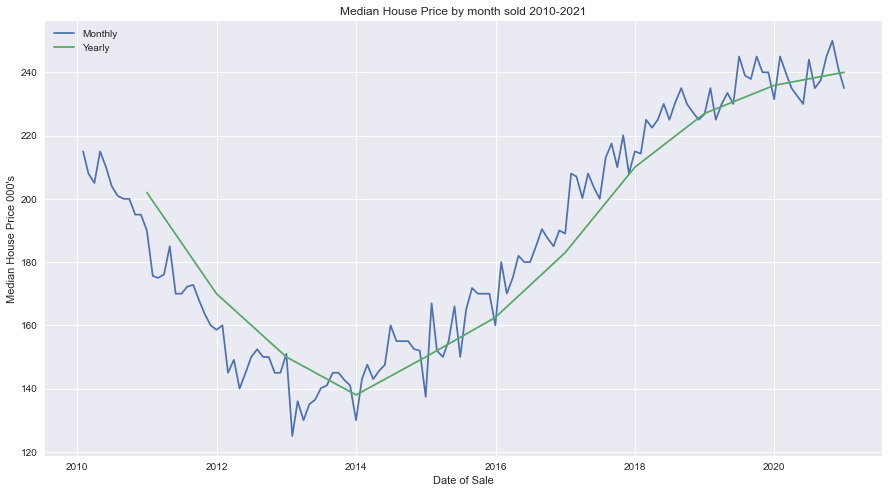

In [10]:
data["Date of Sale (dd/mm/yyyy)"] = pd.to_datetime(data["Date of Sale (dd/mm/yyyy)"])

monthData = data.groupby(pd.Grouper(key="Date of Sale (dd/mm/yyyy)", freq="M")).median()
yearData =  data.groupby(pd.Grouper(key="Date of Sale (dd/mm/yyyy)", freq="Y")).median()

plt.plot(monthData.index, monthData["Price (€)"]/1000, label="Monthly")
plt.plot(yearData.index, yearData["Price (€)"]/1000, label="Yearly")

plt.legend()
plt.xlabel("Date of Sale")
plt.ylabel("Median House Price 000's")
plt.title("Median House Price by month sold 2010-2021")

We can clearly see from the plot above that there are significant changes, in both directions, in median price from month to month.

The year to year changes closely follow the same general pattern and direction as the monthly data. The monthly data doesn't show any clear repeated pattern which would indicate that other factors outside of the time of the year are creating these variations.

It's clear from the data above that there is potential for the prices to go up and down by significant amounts over any given time period. The factors affecting those changes, such as overall performance of the economy and housing supply and more, are outside the scope of this project and it would be impractical to try account for those in our simulation [16].

As the simulation is going to use random sampling to generate the data we will not need the extra accuracy provided by using the monthly data as a reference point. If the simulation was going to take macro-economic factors as well as housing supply and demand data into account then you may want to use the more granular monthly data to generate those projections. For our estimates the yearly data is adequate.
***

The main point we want to look at with regards to dates is how house prices change from year to year. We would like to know what the average change is year on year a the standard deviation of that distribution.

Below we use the pandas method `pct_change()` to create a Pct Change column in the yearData DataFrame. This shows us the percentage difference from year to year. We can see from the code below that the mean change over the 10 years was 2.25% and the  standard deviation was around 10.5%.

In [11]:
yearData["Pct Change"] = yearData["Price (€)"].pct_change()

print("Mean %change: ", yearData["Pct Change"].mean())
print("Std of change: ",yearData["Pct Change"].std())

yearData

Mean %change:  0.02254597992459668
Std of change:  0.10584645997990233


,Price (€),Pct Change
Date of Sale (dd/mm/yyyy),,
2010-12-31,202000.00,NaN
2011-12-31,170000.00,-0.158416
2012-12-31,150000.00,-0.117647
2013-12-31,138000.00,-0.080000
2014-12-31,150000.00,0.086957
2015-12-31,162500.00,0.083333
2016-12-31,183000.00,0.126154
2017-12-31,210000.00,0.147541
2018-12-31,227000.00,0.080952


# Generate Data

Now that we have done our research on the avalable we can start to generate our simulated data. We start by intialising an empty pandas DataFrame `sample` with columns for each variable we want **Date**, **County**, **m_Squared** and **Price**.

As price is our dependant variable we must generate all our other variable first and then use thos values to simulate our price variable.

In [12]:
sample = pd.DataFrame(columns=["Date", "County", "m_Squared", "Price"])

#### Generate county

The first variable we are going to generate is the **County** that each sale takes place. We begin by intialising a random Generator, `rng`, using numpys random module and the method `default_rng` [18]. We can call on this Generator anytime we want to access any of numpy's random methods or distributions. We use a seed value when generating random numbers so that we have repeatable data regardless of when the notebook is run.

From earlier we have the pandas series `countyCount` which has stored each County as it's index and each County's percentage of the total number of houses sold as it's values. Using the `numpy.random.choice()` function we can use this index as our sample and values as the probabilities associated with each entry. This should give us an output that resembles the distribution of counties of the real data with some random variation expected [19].

We are only generating 22,500 entries for our sample data here. This is roughly 10% of the total values we would expect over the five year period. This should be fine for the purposes of our project but could easily increased in needed.

In [13]:
rng = np.random.default_rng(12345)

sample["County"]= rng.choice(countyCount.index, p=countyCount.values, size=22500)

print(sample)

      Date   County m_Squared Price
0      NaN   Dublin       NaN   NaN
1      NaN   Dublin       NaN   NaN
2      NaN    Meath       NaN   NaN
3      NaN  Leitrim       NaN   NaN
4      NaN   Dublin       NaN   NaN
...    ...      ...       ...   ...
22495  NaN   Dublin       NaN   NaN
22496  NaN     Cork       NaN   NaN
22497  NaN  Kildare       NaN   NaN
22498  NaN    Kerry       NaN   NaN
22499  NaN   Dublin       NaN   NaN

[22500 rows x 4 columns]


#### Generate Date

Next we generate our date data. We start by creating a dat range from **1/1/2021 to 31/12/2025** using the pandas `date_range()` function. Next we create the values for the Date column of our sample. We use the numpy random choice method to select dates but this time we don't set any probability, this means any date is as likely to be selected as any other [19].

We also create a **Year** column in our sample using the pandas `DatetimeIndex()` and selecting the year value from the Date column [20]. 


In [14]:
dates = pd.date_range(start='1/1/2021', end='31/12/2025')

sample["Date"] = rng.choice(dates, size=len(sample))
sample["Year"] = pd.DatetimeIndex(sample.loc[:,"Date"]).year

print(sample)

            Date   County m_Squared Price  Year
0     2024-04-16   Dublin       NaN   NaN  2024
1     2024-09-28   Dublin       NaN   NaN  2024
2     2024-07-22    Meath       NaN   NaN  2024
3     2023-04-24  Leitrim       NaN   NaN  2023
4     2023-01-05   Dublin       NaN   NaN  2023
...          ...      ...       ...   ...   ...
22495 2022-04-19   Dublin       NaN   NaN  2022
22496 2022-08-22     Cork       NaN   NaN  2022
22497 2024-12-30  Kildare       NaN   NaN  2024
22498 2025-11-08    Kerry       NaN   NaN  2025
22499 2023-01-22   Dublin       NaN   NaN  2023

[22500 rows x 5 columns]


#### Generate m<sup>2</sup>

Next we generate the square meters of each entry in the sample. Because the Price Property Register doesn't have any reliable data for house size we are going to have to use other sources and make some general assumptions about house sizes in Ireland. 

We are able to find out that the average size of a property in Ireland is 81m<sup>2</sup> so we can use that as our starting point [2]. Housing size information is better available in the UK so we make the assumtion that Irish houses would follow a similar pattern. This may or may not be true but without a better source of data here we it is the best choice we have.

When simulating the data we make the assumption that house size in Ireland follows a normal distribution with the data tends to be around a central value [21]. It is entirely possible that the distribution of house size could be multimodal with peaks around different property types, eg. apartments, terrace, detached, bungalows ect, but we do not currently have the data to support this [22].

To generate the data we are going to use the numpy.random function `normal()` for generating random data in a normal distribution. The normal function takes 3 parameters **loc**, **scale** and **size** and produces an array of values centred around the value of loc with a standard deviation of the scale value [23].

To generate the data we need a central value and a standard deviation. We know that the average house size in Ireland is 81m<sup>2</sup> so we can assign that to the avgArea variable [2]. To estimate the standard deviation we can use the range rule of thumb which says that the range of values should be roughly 4 times the standard deviation [24]. While this may not be precicely accurate it provides a decent enough estimate for our purposes.

As we don't have accurate house size data for Ireland we can look at the UK data for the data range. The English housing survey 2018-19 shows the average house size by property type. The largest property type *Detached Houses* has an average size of 149m<sup>2</sup> and the smalllest type *Purpose-built flats* have an average size of 58m<sup>2</sup> [25]. We can subtract 58 from 149 and divide by 4 to get a rough estimate of the standard deviation.

In [ ]:
avgArea = 81

ukMax = 149
ukMin = 58

areaStd = (ukMax-ukMin)/4

print(areaStd)

Next we use our Generater object **rng** from earlier to access the numpy.random normal() method and use our values for `avgArea` and `areaStd` as our parameters to generated the data for house size and assign it to the sample data column `m_squared`. We round the values to whole numbers as it is uncommon to list house sizes by fractions.

In [15]:
# avg square footage ireland = 81m2

sample["m_Squared"] = rng.normal(loc=avgArea, scale=areaStd, size=len(sample))
sample["m_Squared"] = round(sample["m_Squared"])

print(sample.head())


3152.76818600237
2382.716049382716
22.5


In [16]:
print(data["Price (€)"].mean()/avgArea)
print(data["Price (€)"].median()/avgArea)

avgPerM = data["Price (€)"].mean()/81

        Date   County  m_Squared Price  Year
0 2024-04-16   Dublin       35.0   NaN  2024
1 2024-09-28   Dublin       77.0   NaN  2024
2 2024-07-22    Meath       90.0   NaN  2024
3 2023-04-24  Leitrim       71.0   NaN  2023
4 2023-01-05   Dublin       74.0   NaN  2023


#### Generate Sale Price

In [17]:
medRatio = []

for i in sample["County"]:
    ratio = medianRatio[i]
    
    medRatio.append(ratio)

In [18]:
# Create random change in year avg
yearPct = {}
pct = 1
for year in range(2021, 2026):
    
    yearPct[year] = round(pct + rng.normal(loc=0.022546, scale=0.105846),4)


In [19]:
growth = []

for i in sample["Year"]:
    growpct = yearPct[i]
    
    growth.append(growpct)

In [20]:
msquarePrice = []

for i in sample["m_Squared"]:
        
    price = i * avgPerM
        
    msquarePrice.append(price)
        

In [21]:
noise = rng.normal(1, .05, size=len(sample))

In [22]:
print(noise.max())
print(noise.min())
print(noise.mean())

1.2106863864254889
0.8102035615030747
1.0000161173166742


In [23]:
medRatio = np.asarray(medRatio)
growth = np.asarray(growth)
msquarePrice = np.asarray(msquarePrice)

price = medRatio*growth*msquarePrice*noise

In [24]:
sample["Price"] = price
sample["Price"] = sample["Price"].round().astype(int)

In [25]:
print(sample.head())

        Date   County  m_Squared   Price  Year
0 2024-04-16   Dublin       35.0  212486  2024
1 2024-09-28   Dublin       77.0  447547  2024
2 2024-07-22    Meath       90.0  400084  2024
3 2023-04-24  Leitrim       71.0   80677  2023
4 2023-01-05   Dublin       74.0  297968  2023


# Analyse Generated Data

Analyse the relationship between price and county|m2|Date

Text(0.5, 1.0, 'House Sales Nationwide 2021-2026')

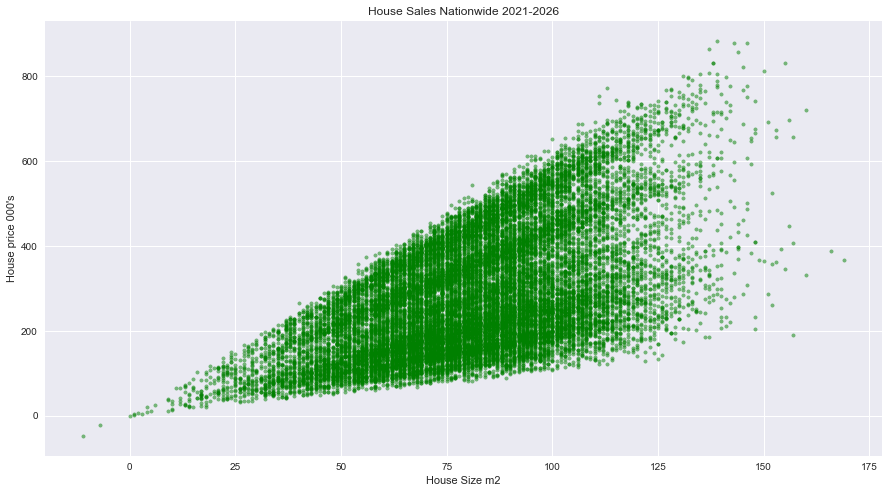

In [26]:
plt.scatter(sample["m_Squared"], sample["Price"]/1000, marker=".", color="g", alpha=0.5, label="Nationwide")
plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.title("House Sales Nationwide 2021-2026")

        Date  County  m_Squared   Price  Year
0 2024-04-16  Dublin       35.0  212486  2024
1 2024-09-28  Dublin       77.0  447547  2024
4 2023-01-05  Dublin       74.0  297968  2023
5 2023-01-25  Dublin      115.0  508992  2023
7 2025-09-09  Dublin      104.0  487672  2025


Text(0.5, 1.0, 'House Sales Dublin by House Size 2021-2026')

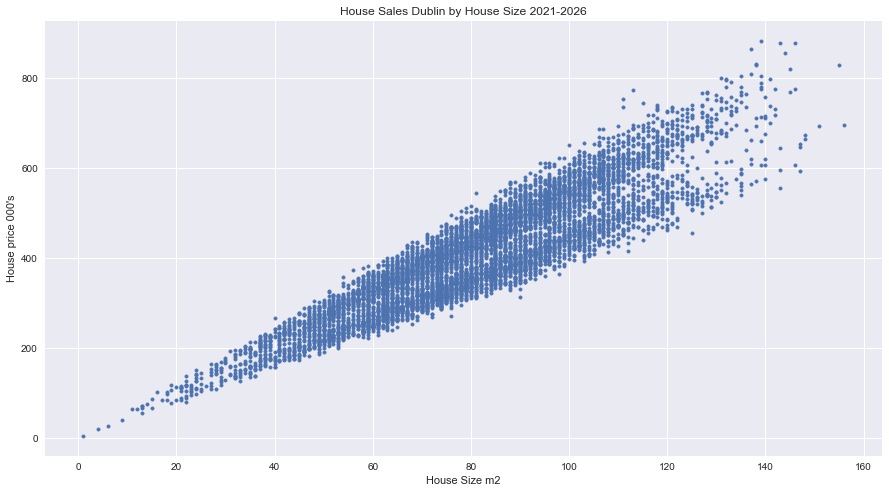

In [27]:
dublin = sample[sample["County"] == "Dublin"]
print(dublin.head())
plt.scatter(dublin["m_Squared"], dublin["Price"]/1000, marker=".")
plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.title("House Sales Dublin by House Size 2021-2026")

## Data by province

In [28]:
munster = ["Cork", "Clare", "Kerry", "Limerick", "Tipperary", "Waterford"]
leinster_exdub = ["Carlow", "Kildare", "Kilkenny", "Laois", "Longford", "Louth", 
                  "Meath", "Offaly", "Wicklow", "Westmeath", "Wexford" ]
connaught = ["Galway", "Leitrim", "Mayo", "Roscommon", "Sligo"]
ulster = ["Cavan", "Monaghan", "Donegal"]

In [29]:
munsterSample = sample[sample["County"].isin(munster)]
leinsterSample = sample[sample["County"].isin(leinster_exdub)]
connaughtSample = sample[sample["County"].isin(connaught)]
ulsterSample = sample[sample["County"].isin(ulster)]

Text(0.5, 1.0, 'House Sales by Province 2021-2026')

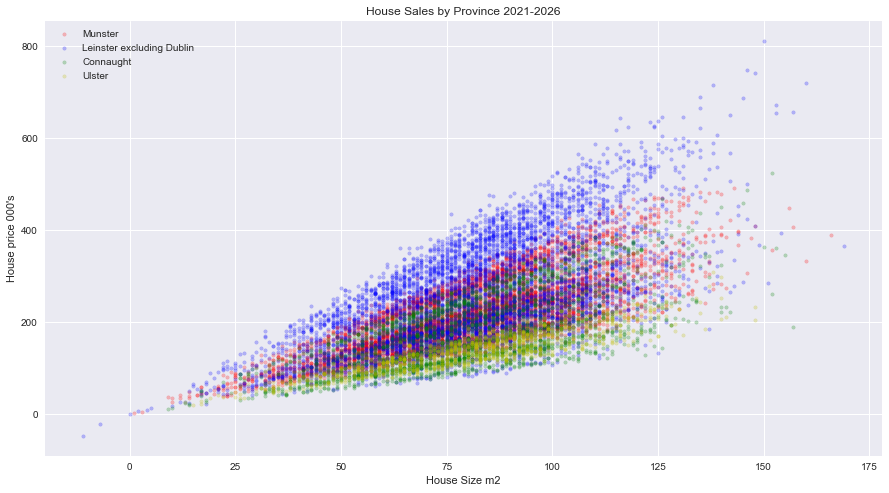

In [30]:
plt.scatter(munsterSample["m_Squared"], munsterSample["Price"]/1000, marker=".", 
            label="Munster", color="r", alpha=.25)
plt.scatter(leinsterSample["m_Squared"], leinsterSample["Price"]/1000, marker=".", 
            label="Leinster excluding Dublin", color="b", alpha=.25)
plt.scatter(connaughtSample["m_Squared"], connaughtSample["Price"]/1000, marker=".", 
            label="Connaught", color="g", alpha=.25)
plt.scatter(ulsterSample["m_Squared"], ulsterSample["Price"]/1000, marker=".", 
            label="Ulster", color="y", alpha=.25)

plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.legend()
plt.title("House Sales by Province 2021-2026")

### Regression

In [31]:
func1 = np.poly1d(np.polyfit(munsterSample["m_Squared"], munsterSample["Price"], 1))

func2 = np.poly1d(np.polyfit(leinsterSample["m_Squared"], leinsterSample["Price"], 1))

func3 = np.poly1d(np.polyfit(connaughtSample["m_Squared"], connaughtSample["Price"], 1))

func4 = np.poly1d(np.polyfit(ulsterSample["m_Squared"], ulsterSample["Price"], 1))

func5 = np.poly1d(np.polyfit(dublin["m_Squared"], dublin["Price"], 1))

func6 = np.poly1d(np.polyfit(sample["m_Squared"], sample["Price"], 1))

Text(0.5, 1.0, 'House Sales by Province 2021-2026')

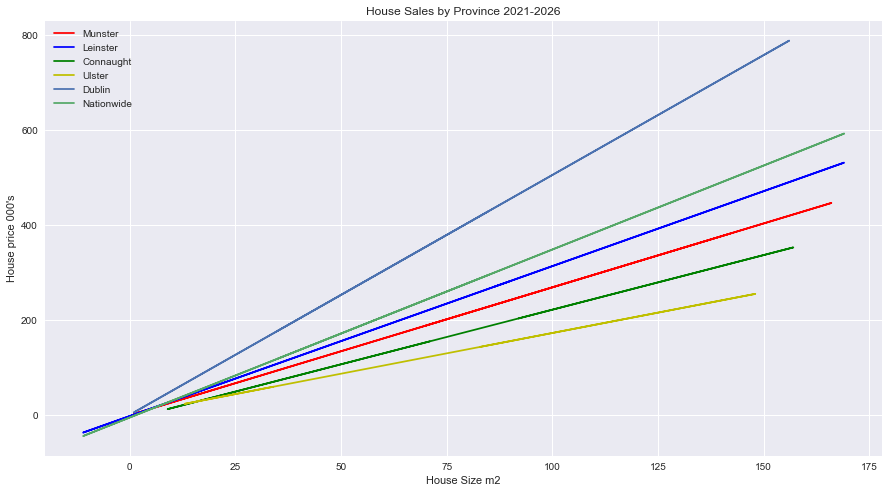

In [32]:
plt.plot(munsterSample["m_Squared"], func1(munsterSample["m_Squared"])/1000, label="Munster", color="r")
plt.plot(leinsterSample["m_Squared"], func2(leinsterSample["m_Squared"])/1000, label="Leinster", color="b")
plt.plot(connaughtSample["m_Squared"], func3(connaughtSample["m_Squared"])/1000, label="Connaught", color="g")
plt.plot(ulsterSample["m_Squared"], func4(ulsterSample["m_Squared"])/1000, label="Ulster", color="y")
plt.plot(dublin["m_Squared"], func5(dublin["m_Squared"])/1000, label="Dublin")
plt.plot(sample["m_Squared"], func6(sample["m_Squared"])/1000, label="Nationwide")

plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.legend(loc='upper left')
plt.title("House Sales by Province 2021-2026")

## Group by Date

In [33]:
months = pd.date_range(start='1/1/2021', end='31/12/2025', freq="M")
#print(months)

In [34]:
monthAvg = sample.groupby(pd.Grouper(key="Date", freq="M")).median()
monthCount= sample.groupby(pd.Grouper(key="Date", freq="M")).count()

Text(0.5, 1.0, 'Median House Price by month sold 2021-2026')

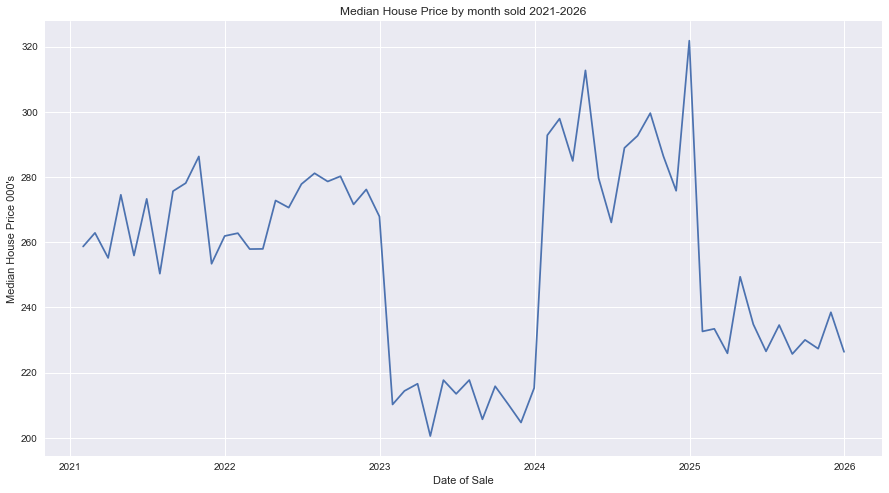

In [35]:
plt.plot(monthAvg.index, monthAvg["Price"]/1000)

plt.xlabel("Date of Sale")
plt.ylabel("Median House Price 000's")
plt.title("Median House Price by month sold 2021-2026")

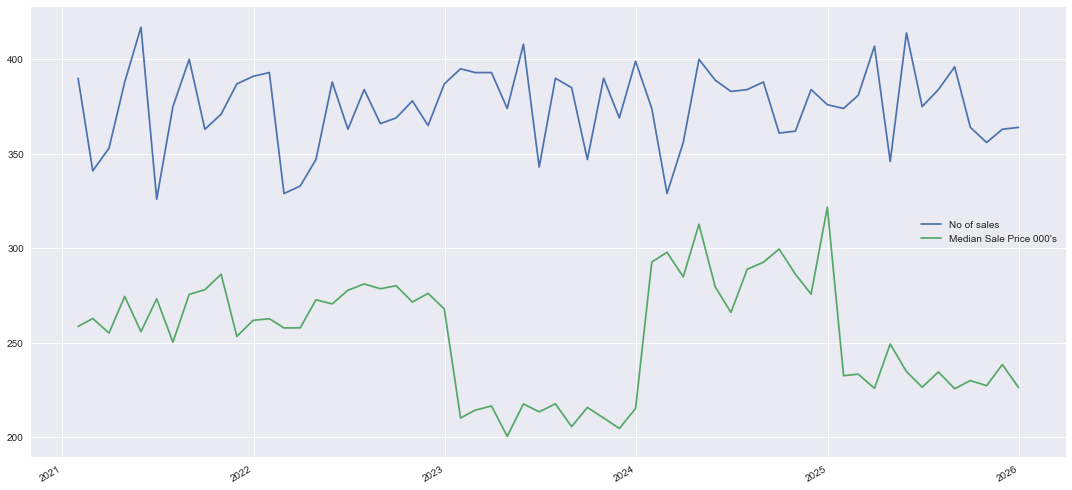

In [36]:
plt.plot(monthCount.index, monthCount["Price"], label="No of sales")
plt.plot(monthAvg.index, monthAvg["Price"]/1000, label="Median Sale Price 000's")

plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.legend(loc='right')

### Region by date

In [37]:
munsterMonth = munsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
leinsterMonth = leinsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
connaughtMonth = connaughtSample.groupby(pd.Grouper(key="Date", freq="M")).median()
ulsterMonth = ulsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
dublinMonth = dublin.groupby(pd.Grouper(key="Date", freq="M")).median()


Text(0.5, 1.0, 'Median House Price by month by region')

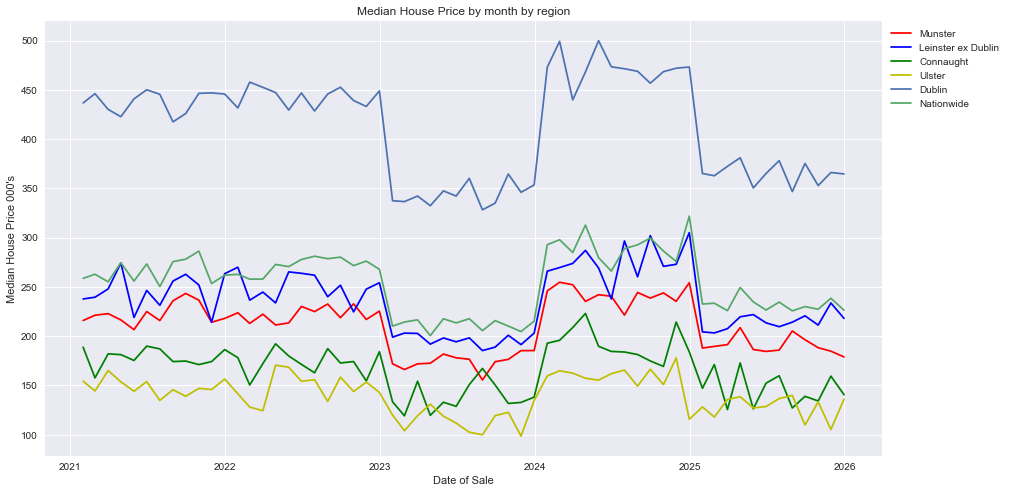

In [38]:
plt.plot(munsterMonth.index, munsterMonth["Price"]/1000, label="Munster", color="r")
plt.plot(leinsterMonth.index, leinsterMonth["Price"]/1000, label="Leinster ex Dublin", color="b")
plt.plot(connaughtMonth.index, connaughtMonth["Price"]/1000, label="Connaught", color="g")
plt.plot(ulsterMonth.index, ulsterMonth["Price"]/1000, label="Ulster", color="y")
plt.plot(dublinMonth.index, dublinMonth["Price"]/1000, label="Dublin")
plt.plot(monthAvg.index, monthAvg["Price"]/1000, label="Nationwide")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Date of Sale")
plt.ylabel("Median House Price 000's")
plt.title("Median House Price by month by region")


# References

1. Residential Property Price Register, (2020) https://propertypriceregister.ie/
2. FinFacts-blog.com, (2018). https://www.finfacts-blog.com/2018/08/average-irish-housing-size-lowest-of.html
3. English Housing Survey, (2017) https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/725085/Floor_Space_in_English_Homes_main_report.pdf
4. ShaneLynn.ie. The Irish Property Price Register – Geocoded to Small Areas. https://www.shanelynn.ie/the-irish-property-price-register-geocoded-to-small-areas/
5. List of Irish Counties by Population. https://en.wikipedia.org/wiki/List_of_Irish_counties_by_population
6. Pandas.pydata.org. https://pandas.pydata.org/
7. Numpy.org. https://numpy.org/
8. Matplotlib.pyplot. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
9. Matplotlib.org. Customizing Matplotlib with style sheets and rcParams. https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html.
10. pandas.pydata,org. pandas.read_csv. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html 
11. TheBalance.com, (2020). Median vs. Average: What's the Difference?. https://www.thebalance.com/median-vs-average-what-the-difference-2682237
12. pandas.pydata.org. DataFrame.groupby. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
13. pandas.pydata.org. pandas.to_datetime. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 
14. pandas.pydata.org. pandas.Grouper. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
15. matplotlib.org. pyplot.plot. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html
16. Pettinger, Tejvan (2019). Factors that affect the housing market. https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/ 
17. pandas.pydata.org. DataFrame.pct_change https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
18. Numpy.org. Random Generator. https://numpy.org/doc/stable/reference/random/generator.html
19. Numpy.org. Random Choice. https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
20. Pandas.pydata.org. pandas.DatetimeIndex. https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
21. Wikipedia. Normal Distribution. https://en.wikipedia.org/wiki/Normal_distribution
22. Wikipedia. Multimodal Distribution. https://en.wikipedia.org/wiki/Multimodal_distribution
23. Numpy.org. numpy.random.normal. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
24. Taylor, Courtney. (2019). Range Rule for Standard Deviation. https://www.thoughtco.com/range-rule-for-standard-deviation-3126231
25. English Housing Survey 2018-19. Size of English homes. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/898369/Size_of_English_Homes_Fact_Sheet_EHS_2018.pdf




https://propertypriceregister.ie/Website/NPSRA/pprweb.nsf/page/ppr-home-en

https://www.macrotrends.net/countries/IRL/ireland/gdp-growth-rate

https://static.rasset.ie/documents/news/2020/07/daft.pdf

https://www.finfacts-blog.com/2018/08/average-irish-housing-size-lowest-of.html#:~:text=What%20is%20striking%20about%20average,and%20107%20in%20the%20Netherlands

https://www.rightmove.co.uk/news/articles/property-news/values-per-square-metre-of-houses-in-england-and-wales-revealed/#:~:text=The%20average%20asking%20price%20per%20square%20metre%20of%20houses%20across,%C2%A310%2C427%20per%20square%20metre



mean price vs median https://understanding.herefordshire.gov.uk/media/1389/why_do_we_use_the_median_figure_for_house_prices_and_earnings.pdf


price property https://www.shanelynn.ie/the-irish-property-price-register-geocoded-to-small-areas/